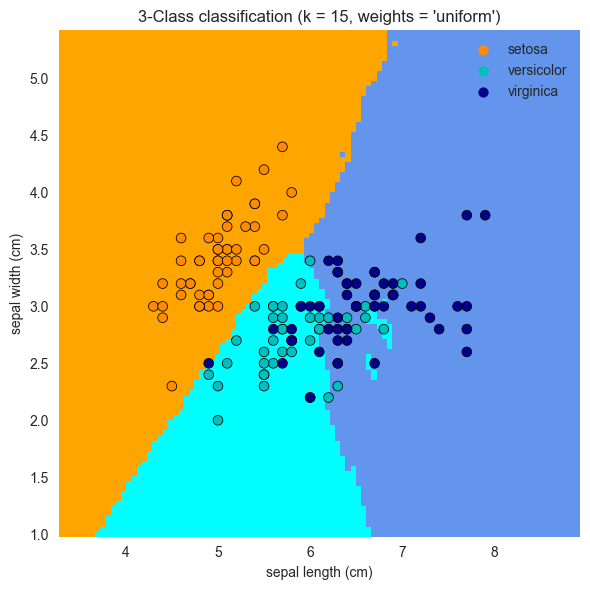

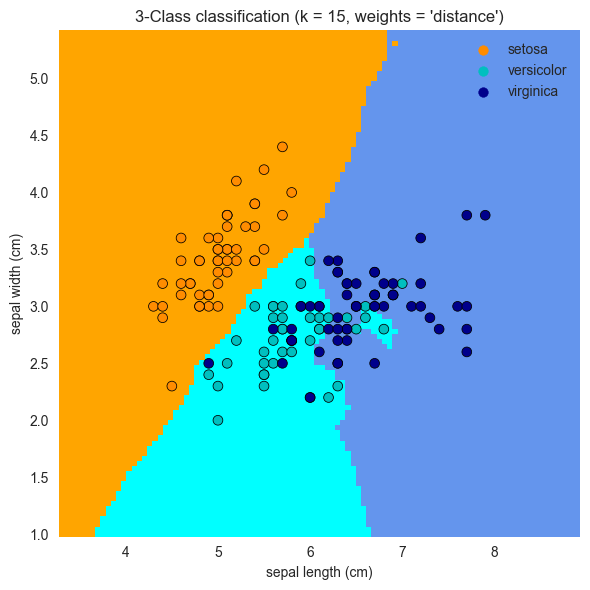

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap4\sourcecode")
# 导入绘图库
import matplotlib.pyplot as plt
# 导入颜色
from matplotlib.colors import ListedColormap
# 导入最近邻模型
from sklearn.neighbors import KNeighborsClassifier
# 导入数据生成工具
from sklearn.datasets import load_iris
# 导入决策边界显示工具
from sklearn.inspection import DecisionBoundaryDisplay
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 导入统计绘图库
import seaborn as sns
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 15个邻居
n_neighbors = 15
# import some data to play with
iris = load_iris()
# 使用前两个特征
X = iris.data[:, :2]
y = iris.target
# 创建颜色map
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
for i, weights in enumerate(["uniform", "distance"]):
    # 构建KNN分类模型
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    # 模型拟合
    clf.fit(X, y)
    fig, ax = plt.subplots(figsize=(6,6), tight_layout=True)
    # 绘制决策边界
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
        ax=ax
    )
    ax.set_title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.show()
    fig.savefig("../codeimage/code{}.pdf".format(i+1))
